**Installing the Libraries**

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**

In [2]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [4]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [5]:
data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [6]:
data['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [7]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
data.drop(["CustomerID"], axis = 1, inplace=True)

In [9]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Clustering Analysis

In [10]:
X = data.iloc[:, [2, 3]].values

In [11]:
print(X[0])

[15 39]


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

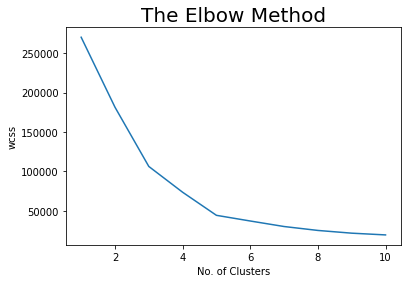

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best number of clusters:', kl.elbow)

Best number of clusters: 5


**Visualizaing the Clusters**

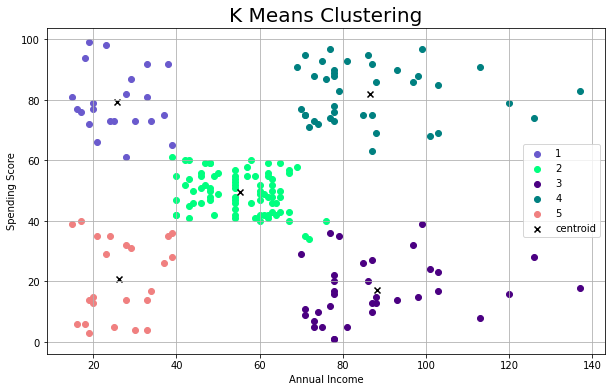

In [14]:
km = KMeans(n_clusters = 5, random_state = 30)
y_means = km.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], c = 'slateblue', label = '1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], c = 'springgreen', label = '2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], c = 'indigo', label = '3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], c = 'teal', label = '4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], c = 'lightcoral', label = '5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], marker='x', c='black' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

K-Means algorithm generated the following 5 clusters:

- clients with low annual income and high spending score
- clients with medium annual income and medium spending score
- clients with high annual income and low spending score
- clients with high annual income and high spending score
- clients with low annual income and low spending score

In [15]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n=5): {silhouette_score(X, y_means)}')

Silhouette Score(n=5): 0.553931997444648


## Hierarchial Clustering

>Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Using Dendrograms to find the no. of Optimal Clusters**

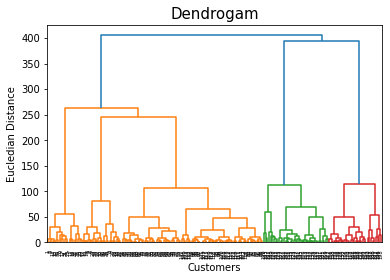

In [16]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.show()

**Visualizing the Clusters of Hierarchial Clustering**

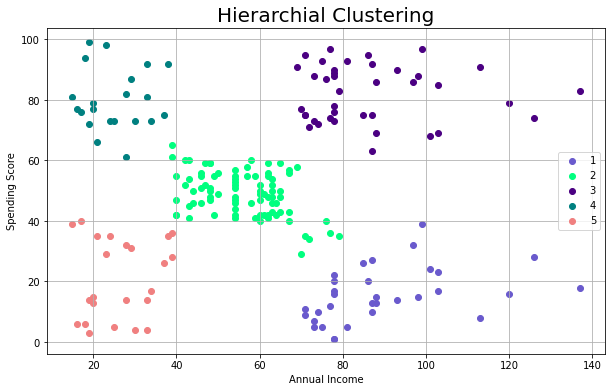

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c = 'slateblue', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c = 'springgreen', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c = 'indigo', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c = 'teal', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], c = 'lightcoral', label = '5')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("For K-Means Clustering:")
print(f'The Silhouette Score(n=5): {round(silhouette_score(X, y_means), 4)}')
print(f'The Davies Bouldin Score(n=5): {round(davies_bouldin_score(X, y_means), 4)}')
print(f'The Calinski Harabasz Score(n=5): {round(calinski_harabasz_score(X, y_means), 4)}')

For K-Means Clustering:
The Silhouette Score(n=5): 0.5539
The Davies Bouldin Score(n=5): 0.5726
The Calinski Harabasz Score(n=5): 247.359


In [19]:
print("For Agglomerative Clustering:")
print(f'The Silhouette Score(n=5): {round(silhouette_score(X, y_hc), 4)}')
print(f'The Davies Bouldin Score(n=5): {round(davies_bouldin_score(X, y_hc), 4)}')
print(f'The Calinski Harabasz Score(n=5): {round(calinski_harabasz_score(X, y_hc), 4)}')

For Agglomerative Clustering:
The Silhouette Score(n=5): 0.553
The Davies Bouldin Score(n=5): 0.5782
The Calinski Harabasz Score(n=5): 243.0714


## Clusters of Customers Based on their Ages

In [20]:
x = data.iloc[:, [1, 3]].values
x.shape

(200, 2)

**K-means Algorithm**

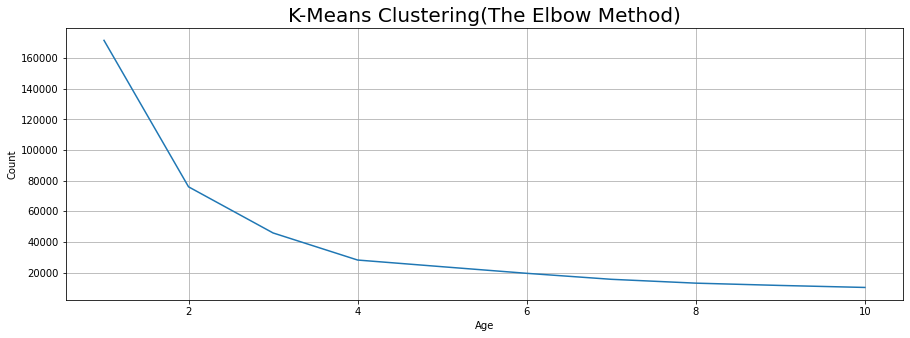

In [21]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

In [22]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best number of clusters:', kl.elbow)

Best number of clusters: 3


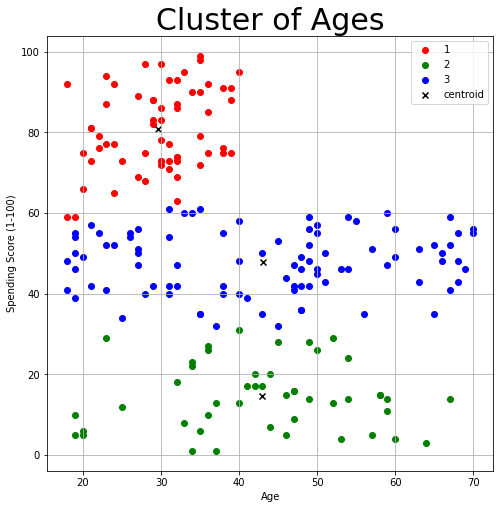

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 30)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (8, 8)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], c = 'red', label = '1')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], c = 'green', label = '2')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], c = 'blue', label = '3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black' , label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [24]:
print(f'The Silhouette Score(n=5) of K-Means Clustering: {round(silhouette_score(x, ymeans), 4)}')

The Silhouette Score(n=5) of K-Means Clustering: 0.453


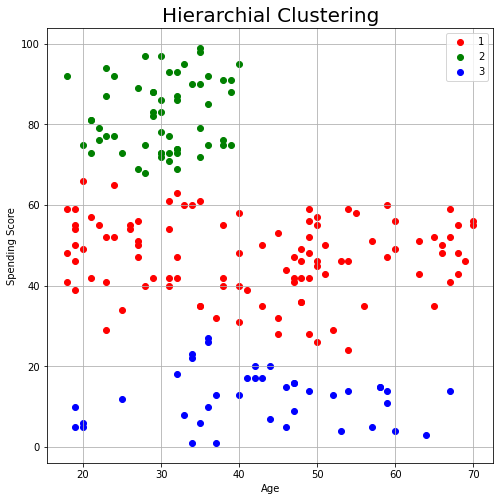

In [25]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.figure(figsize=(8, 8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], c = 'red', label = '1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], c = 'green', label = '2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], c = 'blue', label = '3')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, it's difficult to find a target group.

Even though the highest spending score are customers below 40 year old, there are also a lot of age younger than 40 customers with intermediate or low spending score.